In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import log_loss

## Team 4 - Maanvee, Judy, Jas! 

- the code is collaboration but the interpretations are our own!
- this assignment was very collaborative, so lot of code & interpretations will overlap
- for any questions or concerns please feel free to reach out
- thank. you.

In [2]:
script_df = pd.read_csv('longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv')
medical_df = pd.read_csv('longyear-obese-hypertensive-40-57-medical-SMALL-sample.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Exploratory Data Analysis (EDA):

- Conduct a thorough exploration of the provided datasets. This includes understanding the structure, identifying missing values, and summarizing key statistics.
- Generate visualizations to understand the distribution of important variables, relationships between different variables, and any other patterns or anomalies in the data such as peculiar patterns or outliers

In [3]:
#script_df = script_df_copy
#medical_df = medical_df_copy

In [4]:
script_df.head()

,journey_id,cohort_id,claim_id,patient_gender,patient_state,patient_zip,patient_dob,pharmacy_npi,pharmacist_npi,prescriber_npi,...,bin,plan_pay,reject_code_1,reject_code_3,reject_code_4,reject_code_5,ndc,active,start_date,end_date
0,00006390c96ebfffed580074c35a16a7,16,60618bd8d37311da702bf9349e76f8c26d515c082e136f...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,47335067381,True,190001,None
1,00006390c96ebfffed580074c35a16a7,16,dbeb47defd161331e43f4e359e8d43e4ef7546ff58359b...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,47335067381,True,190001,None
2,00006390c96ebfffed580074c35a16a7,16,02927d081fad10afffcba79bad27f94ff52c98e968aaec...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,47335067381,True,190001,None
3,00006390c96ebfffed580074c35a16a7,16,a412c986e2503a5140ed1482e88b5ec50feeedaf2d89ec...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,47335067381,True,190001,None
4,00006390c96ebfffed580074c35a16a7,16,b65634edd78998753fe9606b142b2fff7765d6c576973c...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,65862059805,True,190001,None


In [5]:
script_df.shape #structure of the script_data

(894623, 48)

In [6]:
script_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894623 entries, 0 to 894622
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   journey_id                     894623 non-null  object 
 1   cohort_id                      894623 non-null  int64  
 2   claim_id                       894623 non-null  object 
 3   patient_gender                 894623 non-null  object 
 4   patient_state                  894623 non-null  object 
 5   patient_zip                    894623 non-null  object 
 6   patient_dob                    894623 non-null  object 
 7   pharmacy_npi                   894623 non-null  object 
 8   pharmacist_npi                 894623 non-null  object 
 9   prescriber_npi                 894623 non-null  object 
 10  primary_care_npi               894623 non-null  object 
 11  group_id                       894623 non-null  object 
 12  date_of_service               

In [7]:
script_df.describe() #summarizing key stats

,cohort_id,ndc11,number_of_refills_authorized,quantity_prescribed_original,quantity_dispensed,fill_number,days_supply,coupon_value_amount,pharmacy_submitted_cost,patient_pay,copay_coinsurance,plan_pay,ndc,start_date
count,894623.000000,8.946230e+05,849519.000000,322348.00000,8.946160e+05,894623.000000,894623.000000,5.0,7.850810e+05,601820.000000,411383.000000,491878.000000,8.946230e+05,894623.000000
mean,16.065902,3.913810e+10,2.496945,11.03221,7.151479e+01,0.855659,41.070293,99.0,4.547052e+02,10.890529,7.075289,167.327912,3.913810e+10,190740.803998
std,0.248110,2.808575e+10,6.861014,85.75864,3.589294e+03,1.600734,29.708626,0.0,4.805967e+04,96.639674,59.716082,802.330352,2.808575e+10,2830.185124
min,16.000000,2.143301e+06,-1.000000,0.00000,0.000000e+00,0.000000,0.000000,99.0,-7.370000e+00,-189.700000,-3198.400000,-1458.620000,2.143301e+06,190001.000000
25%,16.000000,9.046999e+08,0.000000,0.00000,3.000000e+01,0.000000,30.000000,99.0,2.799000e+01,0.000000,0.000000,2.290000,9.046999e+08,190001.000000
50%,16.000000,4.948305e+10,1.000000,0.00000,3.000000e+01,0.000000,30.000000,99.0,9.526000e+01,0.000000,1.350000,13.580000,4.948305e+10,190001.000000
75%,16.000000,6.586206e+10,3.000000,0.00000,9.000000e+01,1.000000,50.000000,99.0,3.220600e+02,4.000000,4.150000,36.300000,6.586206e+10,190001.000000
max,17.000000,9.920701e+10,99.000000,10000.00000,3.390291e+06,99.000000,999.000000,99.0,4.252220e+07,25598.020000,6923.160000,50307.120000,9.920701e+10,202308.000000


In [8]:
# percent of data missing, calculate it for each  column
# Here we are trying to see the missing value percentage per column in the claims data

cols_to_drop=[]
def display_missing_perc(df):    
    for col in df.columns.tolist():       
        missing_value = 100*(df[col].isnull().sum()/len(df[col]))
        print(f'{col} column missing values: {missing_value}')
        if missing_value >= 40:
            cols_to_drop.append(col)
    print('\n')
display_missing_perc(script_df)

journey_id column missing values: 0.0
cohort_id column missing values: 0.0
claim_id column missing values: 0.0
patient_gender column missing values: 0.0
patient_state column missing values: 0.0
patient_zip column missing values: 0.0
patient_dob column missing values: 0.0
pharmacy_npi column missing values: 0.0
pharmacist_npi column missing values: 0.0
prescriber_npi column missing values: 0.0
primary_care_npi column missing values: 0.0
group_id column missing values: 0.0
date_of_service column missing values: 0.0
date_authorized column missing values: 0.0
transaction_type column missing values: 0.0
date_prescription_written column missing values: 0.0
ndc11 column missing values: 0.0
ndc11_original column missing values: 0.0
number_of_refills_authorized column missing values: 5.04167677334475
diagnosis_code column missing values: 9.003569101174461
diagnosis_code_type column missing values: 0.0
quantity_prescribed_original column missing values: 63.968286082517444
quantity_dispensed colu

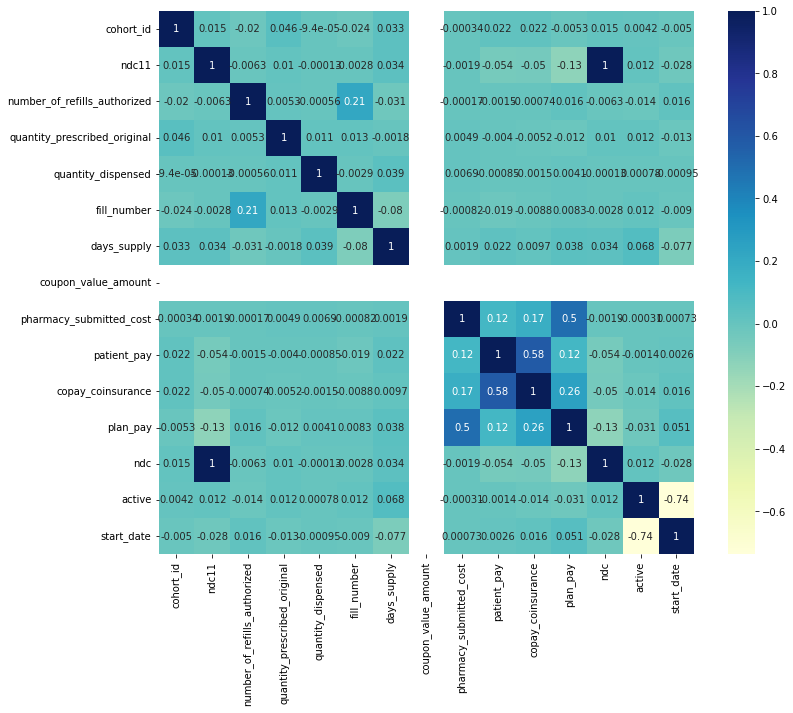

In [9]:
# Making a correaltion chart to see relation between all types of data points to investigate. 

plt.figure(figsize=(12, 10)) #corr matrix
sns.heatmap(script_df.corr(), cmap="YlGnBu", annot = True)
plt.show()


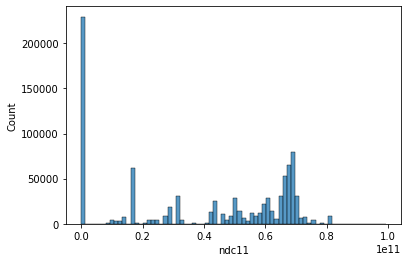

In [10]:
sns.histplot(data=script_df, x='ndc11')
plt.show()
# ndc11

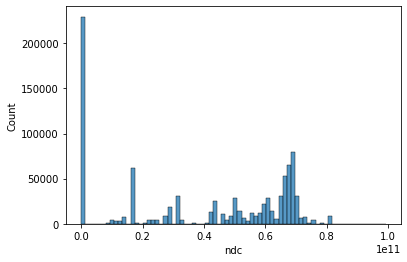

In [11]:
sns.histplot(data=script_df, x='ndc')
plt.show()
# ndc11


In [12]:
medical_df.head()

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,place_of_service,...,diag_4,diag_5,rev_center_code,rev_center_units,proc_code,proc_modifier,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,...,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
1,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,...,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
2,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3074F,NaN,1.0,0.00,0.00,46.57
3,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3078F,NaN,1.0,0.00,0.00,56.38
4,00006d564a4718c744f1bbf1b6c5f8c3,42ba4419d9ad7c9293d76686fb608f10,9e4534892128401c693a6ab2ea758cd6a0a6484972168b...,da5cef18317c14180ed561a84001d8a033d724d541a2c0...,2023-08-11,CA,900.0,55.0,F,Independent Laboratory,...,NaN,NaN,NaN,1.0,80053,NaN,1.0,88.07,88.07,15.16


In [13]:
medical_df.shape #structure of the medical_data

(623525, 34)

In [14]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623525 entries, 0 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         623525 non-null  object 
 1   episode_id         623525 non-null  object 
 2   visit_id           621650 non-null  object 
 3   encounter_id       623525 non-null  object 
 4   claim_date         623525 non-null  object 
 5   patient_state      623525 non-null  object 
 6   patient_short_zip  623512 non-null  float64
 7   patient_age        616980 non-null  float64
 8   patient_gender     623525 non-null  object 
 9   place_of_service   484555 non-null  object 
 10  visit_type         600454 non-null  object 
 11  payor              608936 non-null  object 
 12  payor_channel      586086 non-null  object 
 13  ref_npi            297501 non-null  float64
 14  hcp_npi            434653 non-null  float64
 15  hcp_taxonomy       428209 non-null  object 
 16  hc

In [15]:
medical_df.describe() #summarizing key stats

,patient_short_zip,patient_age,ref_npi,hcp_npi,hco_npi,rev_center_code,rev_center_units,proc_units,line_charge,claim_charge,smart_allowed
count,623512.000000,616980.000000,2.975010e+05,4.346530e+05,6.177890e+05,113926.000000,621558.000000,621331.000000,623525.000000,623525.000000,623525.000000
mean,907.514954,59.416910,1.502083e+09,1.508734e+09,1.485095e+09,456.083449,1.243236,4.319060,482.437268,482.437268,190.295642
std,40.034735,9.946158,2.868359e+08,2.825083e+08,2.859965e+08,451.591644,2.458118,55.208116,3582.592825,3582.592825,509.339625
min,74.000000,30.000000,1.003001e+09,1.003001e+09,1.003006e+09,1.000000,-14.000000,0.000000,0.000000,0.000000,0.000000
25%,900.000000,55.000000,1.255437e+09,1.265668e+09,1.245340e+09,301.000000,1.000000,1.000000,10.000000,10.000000,18.190000
50%,911.000000,60.000000,1.508952e+09,1.528016e+09,1.467631e+09,320.000000,1.000000,1.000000,70.000000,70.000000,75.230000
75%,922.000000,65.000000,1.740350e+09,1.740376e+09,1.720295e+09,521.000000,1.000000,1.000000,200.000000,200.000000,182.360000
max,999.000000,80.000000,1.992999e+09,1.993000e+09,1.992995e+09,3103.000000,730.000000,12473.000000,778750.000000,778750.000000,45035.960000


In [16]:
#look for missing values
# calculate missingn percentage values in the medical history dataset

cols_to_drop=[]
def display_missing_perc(df):    
    for col in df.columns.tolist():       
        missing_value = 100*(df[col].isnull().sum()/len(df[col]))
        print(f'{col} column missing values: {missing_value}')
        if missing_value >= 40:
            cols_to_drop.append(col)
    print('\n')
display_missing_perc(medical_df)

journey_id column missing values: 0.0
episode_id column missing values: 0.0
visit_id column missing values: 0.30070967483260497
encounter_id column missing values: 0.0
claim_date column missing values: 0.0
patient_state column missing values: 0.0
patient_short_zip column missing values: 0.0020849204121727275
patient_age column missing values: 1.0496772382823463
patient_gender column missing values: 0.0
place_of_service column missing values: 22.287799206126458
visit_type column missing values: 3.7000922176336153
payor column missing values: 2.3397618379375325
payor_channel column missing values: 6.004410408564211
ref_npi column missing values: 52.2872378814001
hcp_npi column missing values: 30.29100677599134
hcp_taxonomy column missing values: 31.324485786456037
hcp_specialty column missing values: 31.321278216591153
hco_npi column missing values: 0.919931037247905
hcp_npi_list column missing values: 30.29100677599134
hco_npi_list column missing values: 0.919931037247905
diag_list colu

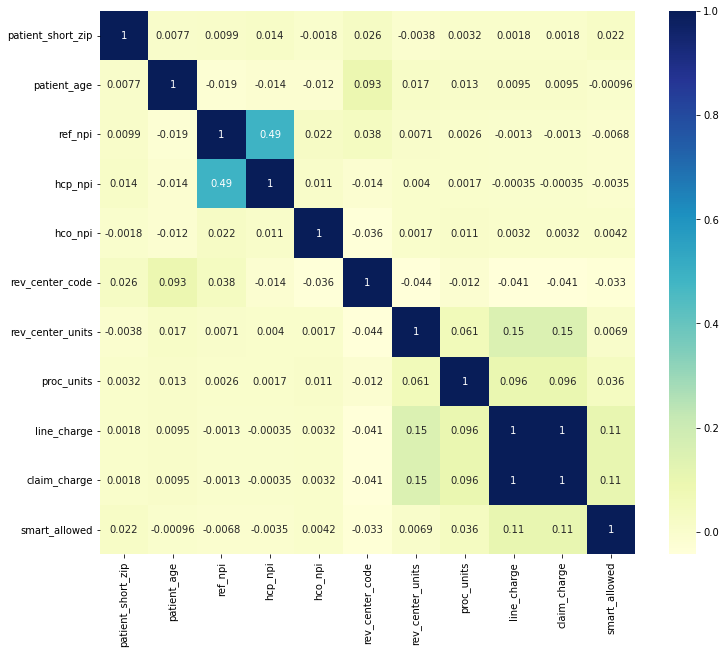

In [17]:
#Making a correaltion chart to see relation between all types of data points to investigate. 


plt.figure(figsize=(12, 10))
sns.heatmap(medical_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

###  The correlation plot helps in understanding some signficant relation between in the ref_npi and hcp_npi. In one class we can observe most values are positive correlation

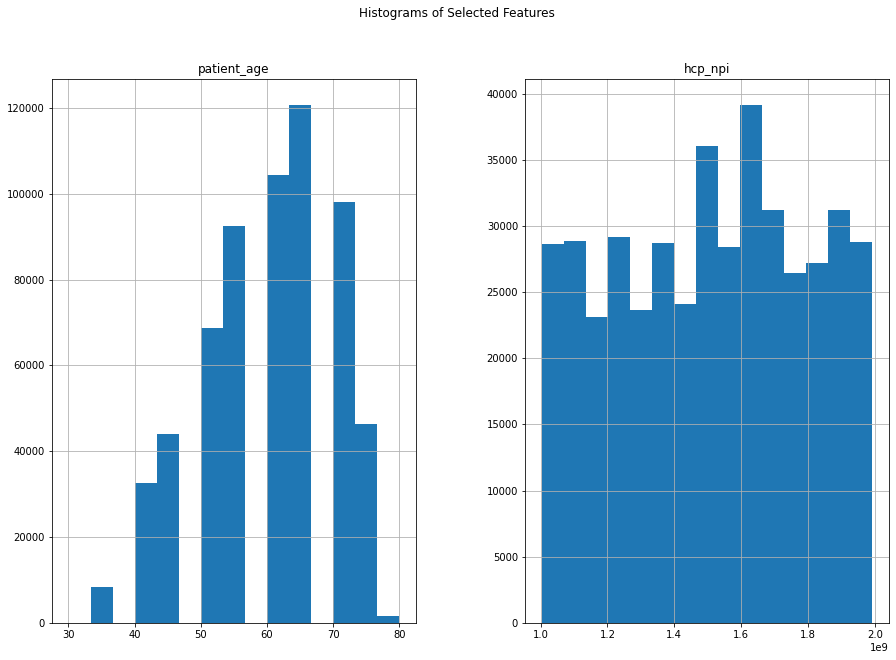

In [18]:
## Some interesting features to look at
features = ['patient_age', 'hcp_npi']
medical_df[features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Selected Features')
plt.show()

### The age is higher at the around 60 to 65 years old for the patients. The hcp_npi shows the somewhat normal distribution with spikes around the middle

### So far the patiennt age is normally distribute, which is good for our analysis

In [19]:
# Select 'diag_' columns for viz

diag_columns = [col for col in medical_df.columns if col.startswith('diag_')]
medical_df_diag = medical_df[diag_columns]
combined_list = medical_df_diag.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]
first_three_counts = {}
for diag_code in combined_list:
    first_three = diag_code[:3]
    first_three_counts[first_three] = first_three_counts.get(first_three, 0) + 1
    

In [20]:
import operator

# Sort the dictionary items by count (descending order)

sorted_counts = sorted(first_three_counts.items(), key=operator.itemgetter(1), reverse=True)

#('E11', 233629)
#('I10', 199537)
#('E78', 113939)
#('Z00', 95083)
#('E66', 69689)

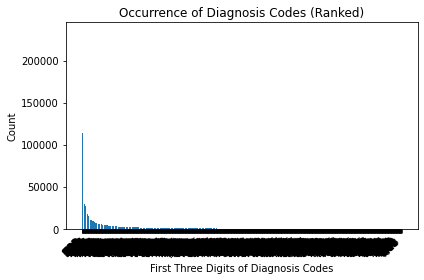

In [21]:
# Extract labels and values
labels = [item[0] for item in sorted_counts]
values = [item[1] for item in sorted_counts]

# Create the bar chart
plt.bar(labels, values)

# Labels and title 
plt.xlabel("First Three Digits of Diagnosis Codes")
plt.ylabel("Count")
plt.title("Occurrence of Diagnosis Codes (Ranked)")

# Optional: Rotate x labels if they are long or overlapping
if len(labels) > 5:  
    plt.xticks(rotation=45, ha='right')  

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()

### This chart shows a combination of all diagnoses code that have been used to detect patients health
### Not much clear info from thiis graph, but seeing the initial spikes, we can expect that there
### are few diagnosis which are higher in number

In [22]:
df_zip = medical_df['patient_short_zip']
combined_list = df_zip.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]
zips = {}
for diag_code in combined_list:
    #first_three = diag_code[:3]
    zips[diag_code] = zips.get(diag_code, 0) + 1
sorted_counts = sorted(zips.items(), key=operator.itemgetter(1), reverse=True)

In [23]:
for items in sorted_counts[:5]:
    print(items)

(900.0, 180469)
(922.0, 166422)
(908.0, 55562)
(921.0, 51190)
(910.0, 48395)


### sorted counts for zip codes with daig_code, now we will plot them to see which state has highest patients

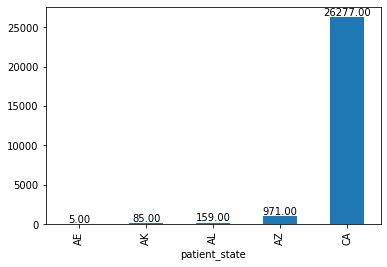

In [24]:
# Check the number of patients' states

patient_state_cnt = medical_df.groupby('patient_state')['journey_id'].nunique()
patient_state_cnt .plot.bar()
for i, v in enumerate(patient_state_cnt):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

## California makes the highest number of patients Ozempic than all the order states.
## California also has more population compared to its fellow states like Alaska, Arizona
## This is something which could be the explanation behind the spike in CA
## However, later on we will discover that most of the patients in CA are concentrated around
## the wealthier SoCal neighborhoods

In [25]:
medical_df_obesity = medical_df[medical_df['diag_1'].str.startswith("E66")|
      medical_df['diag_2'].str.startswith("E66")|
      medical_df['diag_3'].str.startswith("E66")|
      medical_df['diag_4'].str.startswith("E66")|
      medical_df['diag_5'].str.startswith("E66")]

# making a daignosis chart for patients with obesity

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


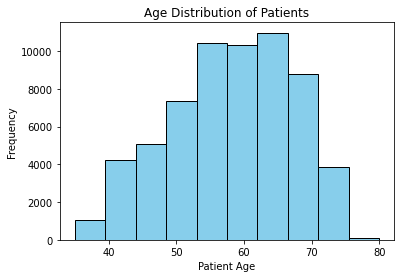

In [26]:
medical_df_obesity['diag'] = "Obesity"
patients_gender_cnt = medical_df_obesity.groupby(['diag', 'patient_gender'])['journey_id'].nunique().reset_index(name = 'count')
total_cnt = patients_gender_cnt.groupby('diag')['count'].transform('sum')
patients_gender_cnt['gender_ratio'] = patients_gender_cnt['count']/total_cnt
patients_gender_cnt

# Age distribution of patients 
plt.hist(medical_df_obesity['patient_age'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients')

# Show the histogram
plt.show()

## The age for patients with obesity and being treated is normally distributed 

(array([ 8920.,     0., 17393.,     0.,     0.,     0.,     0., 20270.,
            0., 16443.]),
 array([2019. , 2019.4, 2019.8, 2020.2, 2020.6, 2021. , 2021.4, 2021.8,
        2022.2, 2022.6, 2023. ]),
 <BarContainer object of 10 artists>)

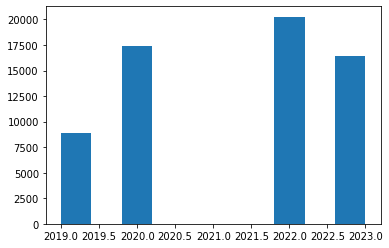

In [27]:
plt.hist(pd.to_datetime(medical_df_obesity['claim_date']).dt.year)

## obesity pateints claim show consistenty in 2019-2020 and stop in 2020 to 2021
## Looks like COVID might have accounted for the missing data between 2020 to 2021
## Obesity patient claims is higher in 2022-2023 

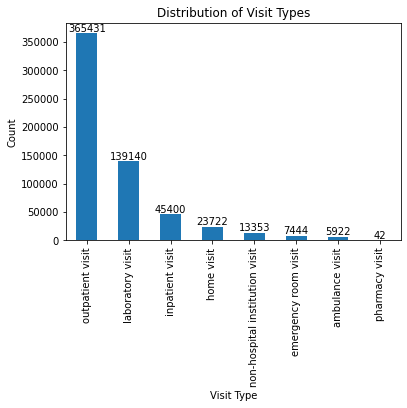

In [28]:
visit_type_counts = medical_df['visit_type'].value_counts()
ax = visit_type_counts.plot(kind='bar')
plt.xlabel('Visit Type')
plt.ylabel('Count')
plt.title('Distribution of Visit Types')
for i, v in enumerate(visit_type_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom') # Adding text for each bar

plt.show()

### The number of visits to emergency room is an important element so we decided to plot but it relevantly lower than outpatient visits. Only has 7444 visits out of the entire dataset.
### Emergency Room visits seems to extreme to be chosen as dependent variable for measuring change / treatment effect due to ozempic
### This plot could be helpful for us to determine our y variable (independent variable)

### Data Preprocessing and Merging:

- Prepare the datasets for analysis by handling missing data, encoding categorical variables, and any other necessary preprocessing steps.
- Merge the Medical and Prescription datasets appropriately, ensuring a coherent structure for further analysis

In [29]:
0.5*script_df.shape[0]

447311.5

In [30]:
col_to_remove = script_df.columns[script_df.isna().sum()>400000]

## Handle Null values

# since we have 894623 rows, all columns with number of null values larger than 400000 (50% of all data) can be removed since there are too many nulls

script_df = script_df.drop(col_to_remove, axis = 1)

In [31]:
## clean the null values for other columns

## replace null with 0 for number_of_refills_authorized as no refills authorized
script_df.loc[script_df['number_of_refills_authorized'].isna(),
              'number_of_refills_authorized'] = 0.0

## check unique values in diagnosis_code
script_df['diagnosis_code'].unique()

# replace nulls with None
script_df.loc[script_df['diagnosis_code'].isna(),
              'diagnosis_code'] = 'None'

## check unique values in unit_of_measure
# according to the unique values of unit_of_measure, there is also an empty value of '  '
# replace null values and '  ' with None
script_df['unit_of_measure'].unique()
# replace nulls with None
script_df.loc[(script_df['unit_of_measure'].isna())|
              (script_df['unit_of_measure'] == '  '),
              'unit_of_measure'] = 'None'

## check unique values in prior_authorization_type_code
script_df['prior_authorization_type_code'].unique()
# replace nulls with None
script_df.loc[script_df['prior_authorization_type_code'].isna(),
              'prior_authorization_type_code'] = 'None'

# pharmacy_submitted_cost is a float, and it is reasonable to replace null with mean
subcost_avg = script_df['pharmacy_submitted_cost'].mean()
script_df.loc[script_df['pharmacy_submitted_cost'].isna(),
              'pharmacy_submitted_cost'] = subcost_avg

# patient_pay is a float, and it is reasonable to replace null with mean
PatientPay_avg = script_df['patient_pay'].mean()
script_df.loc[script_df['patient_pay'].isna(),
              'patient_pay'] = PatientPay_avg

# quantity_dispensed and pcn only has 7 and 6 nulls respectively, no impact of dropping the row
script_df = script_df.loc[~script_df['quantity_dispensed'].isna()]
script_df = script_df.loc[~script_df['pcn'].isna()]

In [32]:
# check null values, no null
script_df.isna().sum()

journey_id                       0
cohort_id                        0
claim_id                         0
patient_gender                   0
patient_state                    0
patient_zip                      0
patient_dob                      0
pharmacy_npi                     0
pharmacist_npi                   0
prescriber_npi                   0
primary_care_npi                 0
group_id                         0
date_of_service                  0
date_authorized                  0
transaction_type                 0
date_prescription_written        0
ndc11                            0
ndc11_original                   0
number_of_refills_authorized     0
diagnosis_code                   0
diagnosis_code_type              0
quantity_dispensed               0
place_of_service                 0
is_service                       0
level_of_service                 0
fill_number                      0
days_supply                      0
unit_of_measure                  0
prior_authorization_

***Variable selection***

Below are some of the key variables which we have selected to be used from claims data.
No feature selection techniques were performed owing due to system performance constraints.

Some of the key variables from below include:
journey_id -- This variable tracks the journey of each patient
ndc -- using this variiable  we will filter out ozempic labelled medications

In [33]:
# keep only the columns we need, patients background information are included in the medical_df

script_df = script_df.loc[:,('journey_id','cohort_id','ndc','diagnosis_code',
                             'diagnosis_code_type','quantity_dispensed','days_supply',
                             'number_of_refills_authorized','fill_number',
                             'is_compound_drug')]

In [34]:
# clean medical_df

medical_df.isna().sum()

journey_id                0
episode_id                0
visit_id               1875
encounter_id              0
claim_date                0
patient_state             0
patient_short_zip        13
patient_age            6545
patient_gender            0
place_of_service     138970
visit_type            23071
payor                 14589
payor_channel         37439
ref_npi              326024
hcp_npi              188872
hcp_taxonomy         195316
hcp_specialty        195296
hco_npi                5736
hcp_npi_list         188872
hco_npi_list           5736
diag_list               870
diag_1                  870
diag_2               162930
diag_3               258241
diag_4               325292
diag_5               418509
rev_center_code      509599
rev_center_units       1967
proc_code             23913
proc_modifier        457577
proc_units             2194
line_charge               0
claim_charge              0
smart_allowed             0
dtype: int64

In [35]:
medical_df.head()

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,place_of_service,...,diag_4,diag_5,rev_center_code,rev_center_units,proc_code,proc_modifier,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,...,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
1,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,...,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
2,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3074F,NaN,1.0,0.00,0.00,46.57
3,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3078F,NaN,1.0,0.00,0.00,56.38
4,00006d564a4718c744f1bbf1b6c5f8c3,42ba4419d9ad7c9293d76686fb608f10,9e4534892128401c693a6ab2ea758cd6a0a6484972168b...,da5cef18317c14180ed561a84001d8a033d724d541a2c0...,2023-08-11,CA,900.0,55.0,F,Independent Laboratory,...,NaN,NaN,NaN,1.0,80053,NaN,1.0,88.07,88.07,15.16


***Variable Selection for Medical Data ***

Below we select columns from medical history dataset. No feature selection performed, we picked variables 
purely out of interest.

In [36]:
# keep only relevant variables that can help control treatment effect
medical_df = medical_df.loc[:,('journey_id','episode_id','claim_date','patient_state','patient_short_zip',
                'patient_age','patient_gender','diag_list','proc_code','smart_allowed')]

# filter out obese patients
# keep entry if E66 exists in diag_list
# define pattern of E66

medical_df = medical_df.loc[(medical_df['diag_list'].str.contains('E66',na = False))|
                            (medical_df['diag_list'].str.contains('I10',na = False))]

# the first ozempic get prescribed
first_oze = medical_df[medical_df['proc_code'] == 'J3490']['claim_date'].min()

# filter rows after ozempic get prescribed
medical_df = medical_df.loc[medical_df['claim_date']>first_oze]

# replace age missing value with mean
mean_age = round(medical_df['patient_age'].mean())
medical_df.loc[medical_df['patient_age'].isna(),'patient_age'] = mean_age

# drop 8 nulls in patient_short_zip
medical_df = medical_df.loc[medical_df['patient_short_zip'].isna()==False]


In [37]:
# check null values
medical_df.isna().sum()

journey_id               0
episode_id               0
claim_date               0
patient_state            0
patient_short_zip        0
patient_age              0
patient_gender           0
diag_list                0
proc_code            14507
smart_allowed            0
dtype: int64

In [38]:
## we filter the insurance claims dataset to weed. out any 
## condition other than E66|I10

#script_df['diagnosis_code'].unique()

filtered_df_e66 = script_df[script_df['diagnosis_code'].astype(str).str.contains('E66|I10')]

In [39]:
medical_df.head()

,journey_id,episode_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,diag_list,proc_code,smart_allowed
6,00006d564a4718c744f1bbf1b6c5f8c3,cfc123a94e0e7687f5970ef10298b4f3,2022-09-16,CA,900.0,50.0,F,"R9431,E039,I10,Z6825",1159F,44.68
10,00006d564a4718c744f1bbf1b6c5f8c3,cfc123a94e0e7687f5970ef10298b4f3,2022-09-16,CA,900.0,50.0,F,"R9431,E039,I10,Z6825",3008F,48.46
13,00006d564a4718c744f1bbf1b6c5f8c3,cfc123a94e0e7687f5970ef10298b4f3,2022-09-16,CA,900.0,50.0,F,"R9431,E039,I10,Z6825",1160F,42.00
16,00006d564a4718c744f1bbf1b6c5f8c3,cfc123a94e0e7687f5970ef10298b4f3,2022-09-28,CA,900.0,50.0,F,"N200,I10,E039",50432,429.73
17,00006d564a4718c744f1bbf1b6c5f8c3,cad5e8635fd011bfec2b65d161b15254,2019-11-01,CA,900.0,50.0,F,"E7800,E039,I10,R809",80053,15.16


In [40]:
filtered_df_e66.head()

,journey_id,cohort_id,ndc,diagnosis_code,diagnosis_code_type,quantity_dispensed,days_supply,number_of_refills_authorized,fill_number,is_compound_drug
68,000072bc05e31d0126475c7a3e771af1,16,31722070090,I10,10,30.0,30.0,1.0,0.0,False
69,000072bc05e31d0126475c7a3e771af1,16,31722070090,I10,None,30.0,30.0,0.0,0.0,None
70,000072bc05e31d0126475c7a3e771af1,16,31722070090,I10,None,30.0,30.0,0.0,3.0,None
77,000072bc05e31d0126475c7a3e771af1,16,31722070090,I10,10,30.0,30.0,1.0,2.0,False
78,000072bc05e31d0126475c7a3e771af1,16,31722070090,I10,None,30.0,30.0,0.0,4.0,None


In [41]:
## merge the 2 files
df = pd.merge(medical_df,filtered_df_e66,on='journey_id')
df.head()

,journey_id,episode_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,diag_list,proc_code,smart_allowed,cohort_id,ndc,diagnosis_code,diagnosis_code_type,quantity_dispensed,days_supply,number_of_refills_authorized,fill_number,is_compound_drug
0,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,16,31722070090,I10,10,30.0,30.0,1.0,0.0,False
1,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,16,31722070090,I10,None,30.0,30.0,0.0,0.0,None
2,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,16,31722070090,I10,None,30.0,30.0,0.0,3.0,None
3,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,16,31722070090,I10,10,30.0,30.0,1.0,2.0,False
4,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,16,31722070090,I10,None,30.0,30.0,0.0,4.0,None


In [42]:
df.isna().sum()
# proc_code will be dropped later when the treatment dummy is created

journey_id                          0
episode_id                          0
claim_date                          0
patient_state                       0
patient_short_zip                   0
patient_age                         0
patient_gender                      0
diag_list                           0
proc_code                       17071
smart_allowed                       0
cohort_id                           0
ndc                                 0
diagnosis_code                      0
diagnosis_code_type                 0
quantity_dispensed                  0
days_supply                         0
number_of_refills_authorized        0
fill_number                         0
is_compound_drug                    0
dtype: int64

In [43]:
# create the treatment dummy from proc_code and ndc
#df['ozempic'] = np.where((df['proc_code'] == 'J3490')|
            #             (df['ndc'].astype(str).str.contains('169413')),1,0)

    
    ### Below we have researched to find the ndc codes ozempic was sold. under

df['ozempic'] = np.where((df['proc_code'] == 'J3490') |
                         (df['ndc'].astype(str).str.contains('169413')) |
                         (df['ndc'].astype(str).str.contains('169418')) |
                         (df['ndc'].astype(str).str.contains('169477212')) |
                         (df['ndc'].astype(str).str.contains('50090594900')), 1, 0)

In [44]:
df['ozempic'].sum()

2265

In [45]:
# Above is the number of people who actually were prescribed a Ozempic medicine
# we are sure about this because we filtered based on ndc codes

In [46]:
# drop the few patients with gender none
df = df[df['patient_gender'] != 'None']
df.loc[df['patient_gender']=='None'].shape

(0, 20)

In [47]:
## gender dummy variable

# Map 'M' to 0 and 'F' to 1
df['gender_encoded'] = df['patient_gender'].map({'M': 0, 'F': 1})

df['gender_encoded'] = df['gender_encoded'].astype(int)

# Verify the changes
df.head()

,journey_id,episode_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,diag_list,proc_code,smart_allowed,...,ndc,diagnosis_code,diagnosis_code_type,quantity_dispensed,days_supply,number_of_refills_authorized,fill_number,is_compound_drug,ozempic,gender_encoded
0,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,...,31722070090,I10,10,30.0,30.0,1.0,0.0,False,0,0
1,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,...,31722070090,I10,None,30.0,30.0,0.0,0.0,None,0,0
2,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,...,31722070090,I10,None,30.0,30.0,0.0,3.0,None,0,0
3,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,...,31722070090,I10,10,30.0,30.0,1.0,2.0,False,0,0
4,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,...,31722070090,I10,None,30.0,30.0,0.0,4.0,None,0,0


***Dependent Variable***

Here we are creating our y variable (Dependent Variable)

Essentially, we are going to create a new dummy variable columnn which tracks if patient was cured or not with ozempic.

How did we classify. if they are cured?

We check the first and last visit of each patient.
If any of the diagnosis (obesity & hypertension) drop from the last visit, we say they have been cured

In [48]:
# Get the first occurrence of each journey_id
first_rows = df.groupby('journey_id', as_index=False).head(1)

# Get the last occurrence of each journey_id
last_rows = df.groupby('journey_id', as_index=False).tail(1)

# Concatenate the first and last rows
combined_rows = pd.concat([first_rows, last_rows])

# Drop duplicates in case the first and last row are the same for any journey_id
combined_rows = combined_rows.drop_duplicates()

# Reset the index of the combined DataFrame
combined_rows = combined_rows.reset_index(drop=True)

# Now combined_rows DataFrame contains the first and 
# last occurrences of each journey_id along with all other columns
combined_rows.head()

,journey_id,episode_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,diag_list,proc_code,smart_allowed,...,ndc,diagnosis_code,diagnosis_code_type,quantity_dispensed,days_supply,number_of_refills_authorized,fill_number,is_compound_drug,ozempic,gender_encoded
0,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,...,31722070090,I10,10,30.0,30.0,1.0,0.0,False,0,0
1,00011020325337a2a22fb26b6492196a,b2c64ae3446f18774940259e7f096541,2023-01-03,CA,922.0,75.0,M,"Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785",93000,77.31,...,65862078130,I10,10,90.0,90.0,0.0,0.0,False,0,0
2,000362c8cc869075f4c2b6533887d4aa,52ceb00e0607228759315e198b38cbc1,2022-09-06,CA,913.0,65.0,F,"F330,E559,E039,D649,R970,Z1231,M810,I10",3078F,56.38,...,185021101,I10,10,30.0,30.0,3.0,6.0,False,0,1
3,0004da06b6b88eb1375e7a772a1d3162,a6769061439eb72969e89f80aca8d182,2022-05-04,CA,900.0,55.0,M,"I10,E785,F419",36415,118.08,...,31722070290,I10,None,30.0,30.0,3.0,0.0,False,0,0
4,00056d0b79fda876cae788d6920c902a,3bb92ee3ff1f72d471735ba19cae0d93,2019-06-21,CA,900.0,60.0,F,"I10,N182,R7302",83036,176.76,...,65862016899,I10,10,90.0,90.0,0.0,0.0,False,0,1


In [49]:
# Sort the combined_rows DataFrame based on 'journey_id'

sorted_combined_rows = combined_rows.sort_values(by='journey_id')

# Reset the index of the sorted DataFrame for good measure (optional)
sorted_combined_rows = sorted_combined_rows.reset_index(drop=True)

# Display the sorted DataFrame
sorted_combined_rows.head()

,journey_id,episode_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,diag_list,proc_code,smart_allowed,...,ndc,diagnosis_code,diagnosis_code_type,quantity_dispensed,days_supply,number_of_refills_authorized,fill_number,is_compound_drug,ozempic,gender_encoded
0,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,...,31722070090,I10,10,30.0,30.0,1.0,0.0,False,0,0
1,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99396,97.77,...,31722070090,I10,None,30.0,30.0,0.0,2.0,None,0,0
2,00011020325337a2a22fb26b6492196a,b2c64ae3446f18774940259e7f096541,2023-01-03,CA,922.0,75.0,M,"Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785",1159F,44.68,...,67877019805,I10,10,90.0,90.0,0.0,0.0,False,0,0
3,00011020325337a2a22fb26b6492196a,b2c64ae3446f18774940259e7f096541,2023-01-03,CA,922.0,75.0,M,"Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785",93000,77.31,...,65862078130,I10,10,90.0,90.0,0.0,0.0,False,0,0
4,000362c8cc869075f4c2b6533887d4aa,52ceb00e0607228759315e198b38cbc1,2022-09-06,CA,913.0,65.0,F,"F330,E559,E039,D649,R970,Z1231,M810,I10",3078F,56.38,...,185021101,I10,10,30.0,30.0,3.0,6.0,False,0,1


In [50]:
# Initialize the dummy column to 0 for all rows initially
sorted_combined_rows['disease_cured'] = 0

# Function to check if disease is considered cured based on diag_list comparison

def is_disease_cured(final_diag):
    
    # Define the codes that, if missing in the final diagnosis, meaning it was a successfully cured
    
    codes_for_cure = ['E669', 'I10', 'E663']
    
    # Check if all specified codes are missing in the final diagnosis
    return all(code not in final_diag for code in codes_for_cure)

# Iterate through each unique journey_id
for journey_id in sorted_combined_rows['journey_id'].unique():
    
    
    # Filter rows for the current journey_id
    rows = sorted_combined_rows[sorted_combined_rows['journey_id'] == journey_id]
    
    final_diag = rows.iloc[-1]['diag_list']
    
    # Check if the disease is cured based on diag_list comparison
    cured = is_disease_cured(final_diag)
    
    # Update the 'disease_cured' column for all rows with the current journey_id
    
    sorted_combined_rows.loc[sorted_combined_rows['journey_id'] == journey_id, 'disease_cured'] = int(cured)
    
    
    
sorted_combined_rows.head()

,journey_id,episode_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,diag_list,proc_code,smart_allowed,...,diagnosis_code,diagnosis_code_type,quantity_dispensed,days_supply,number_of_refills_authorized,fill_number,is_compound_drug,ozempic,gender_encoded,disease_cured
0,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99212,72.99,...,I10,10,30.0,30.0,1.0,0.0,False,0,0,0
1,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",99396,97.77,...,I10,None,30.0,30.0,0.0,2.0,None,0,0,0
2,00011020325337a2a22fb26b6492196a,b2c64ae3446f18774940259e7f096541,2023-01-03,CA,922.0,75.0,M,"Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785",1159F,44.68,...,I10,10,90.0,90.0,0.0,0.0,False,0,0,0
3,00011020325337a2a22fb26b6492196a,b2c64ae3446f18774940259e7f096541,2023-01-03,CA,922.0,75.0,M,"Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785",93000,77.31,...,I10,10,90.0,90.0,0.0,0.0,False,0,0,0
4,000362c8cc869075f4c2b6533887d4aa,52ceb00e0607228759315e198b38cbc1,2022-09-06,CA,913.0,65.0,F,"F330,E559,E039,D649,R970,Z1231,M810,I10",3078F,56.38,...,I10,10,30.0,30.0,3.0,6.0,False,0,1,0


In [51]:
len(sorted_combined_rows["ozempic"]==1)

3763

### Causal Analysis Setup

- Discuss the potential endogeneity issues in estimating the treatment effect of Ozempic on the target population.
- Outline your strategy for addressing endogeneity, referencing the big-picture problem of causality and treatment effect estimation discussed in class.

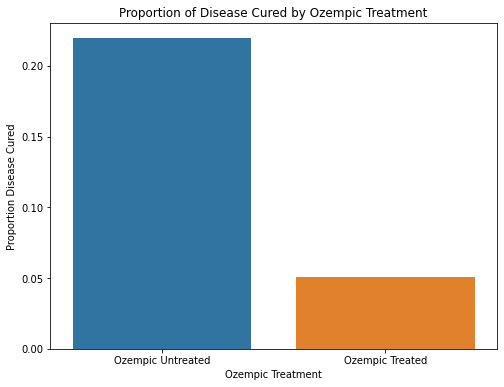

In [52]:
#looking at our relation for trement for disease cured which is y variable


ozempic_untreated = sorted_combined_rows[sorted_combined_rows['ozempic'] == 1]['disease_cured'].mean()
ozempic_treated = sorted_combined_rows[sorted_combined_rows['ozempic'] == 0]['disease_cured'].mean()
df_3 = pd.DataFrame({
    'Ozempic': ['Ozempic Untreated', 'Ozempic Treated'],
    'Proportion Disease Cured': [ozempic_untreated, ozempic_treated] 
}) # creating to see the 
plt.figure(figsize=(8, 6))
sns.barplot(x='Ozempic', y='Proportion Disease Cured', data=df_3) # Plot the bar chart
plt.title('Proportion of Disease Cured by Ozempic Treatment')
plt.ylabel('Proportion Disease Cured')
plt.xlabel('Ozempic Treatment')
plt.show()

In [53]:
# Here we can see the proportion of Ozempic treated vs non treatment people who are
# suffering from hypertension / obesity or both


In [54]:
df_3 #data on treavted vs untreated patients

,Ozempic,Proportion Disease Cured
0,Ozempic Untreated,0.219512
1,Ozempic Treated,0.050779


As learned in class, causal inference indicates cause-and-effect connections between variables using observational data or experiment data. It aims to quantify the impact of changes in one variable on another while addressing potential biases. Methods like randomized trials are employed to estimate causal effects accurately. These approaches enable researchers to draw valid conclusions regarding the effectiveness of interventions or treatments, such as Ozempic, on outcomes, considering confounding factors and ensuring robustness in the analysis. But in observational data like ours, it is hard to create a cause and effect relation. So, we use partial lasso to aid those lack in making causal inference

The barplot data shows the proportion of disease cured among individuals who received Ozempic treatment (Ozempic Treated) and those who did not receive Ozempic treatment (Ozempic Untreated). Interpreting this data in the context of addressing endogeneity issues in estimating the treatment effect of Ozempic on the target population, we can observe the following:

- **Low Proportion of Disease Cured among Ozempic Treated**: The proportion of disease cured among individuals who received Ozempic treatment (0.050779) is significantly lower compared to those who did not receive Ozempic treatment (0.219512). This suggests that Ozempic treatment alone may not be highly effective in curing the disease, or there may be other factors influencing the treatment outcome.

- **Potential Endogeneity Issues**: The difference in the proportion of disease cured between the Ozempic Treated and Untreated groups could indicate the presence of endogeneity issues. For example, if individuals with more severe cases of the disease are more likely to receive Ozempic treatment, then the observed difference in cure rates may be biased due to unobserved factors related to disease severity.

- **Addressing Endogeneity**: To address endogeneity, we need to carefully consider the factors that may influence both the likelihood of receiving Ozempic treatment and the probability of disease cure. This could involve controlling for relevant covariates in the analysis, such as patients' baseline health status, demographic characteristics, and comorbidities. Additionally, using instrumental variable analysis or propensity score matching techniques may help mitigate biases arising from unobserved confounders or reverse causality.

In summary, while the observed difference in disease cure rates between Ozempic-treated and untreated groups provides valuable insights, addressing potential endogeneity issues requires a comprehensive analysis that considers various factors influencing treatment assignment and outcome. By implementing appropriate methodologies and controlling for confounding variables, we can obtain more accurate estimates of the treatment effect of Ozempic on the target population.

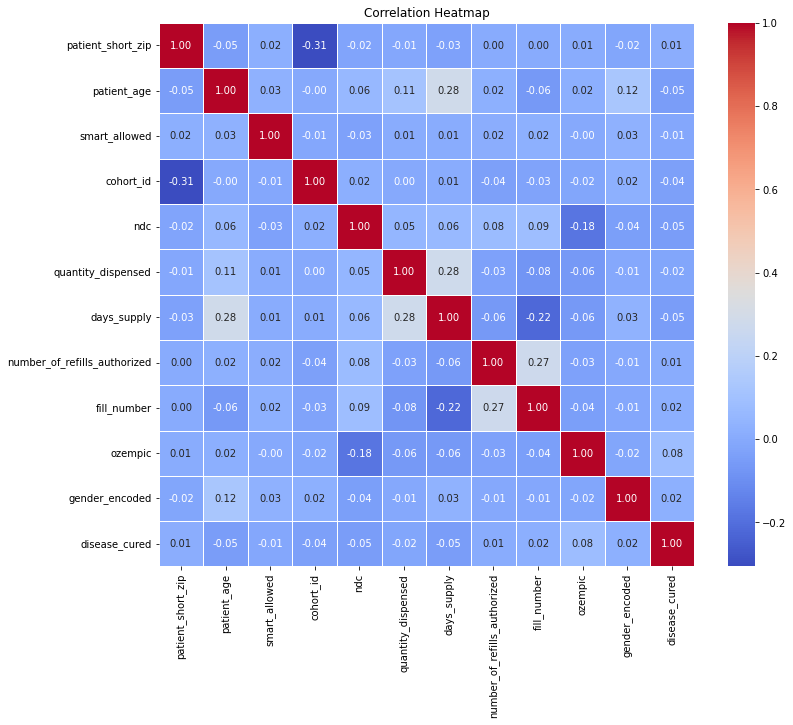

In [55]:
corr = sorted_combined_rows.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

As discussed in class for Treatment Effects, my strategy to ato address endogeneity in estimating of Ozempic impact, we wil use the Double Lasso method. This involves two stages:

**First Stage Lasso Regression: Use Lasso regression to model the treatment assignment (Ozempic usage) based on observed covariates and other variables. This helps select relevant variables and mitigate omitted variable bias. Second Stage Lasso Regression with Residual: Regress the Y variable (e.g., disease cure) on both the treatment assignment residuals from the first stage and the original covariates. This corrects for endogeneity and provides unbiased treatment effect estimates.**

In the end, we will evaluate model performance and interpret results, considering the implications for causal inference. This approach addresses endogeneity by appropriately controlling for confounding factors, providing more reliable estimates of Ozempic's treatment effect.

### Model Development: Double-Lasso / Treatment Effect Lasso

- Implement the double-lasso technique to estimate the treatment effect of Ozempic, considering the endogeneity of treatment assignment.
- Justify the inclusion of variables in your model, explaining the rationale behind each decision.

In [56]:
from sklearn.preprocessing import LabelEncoder

## further encode the variables

# convert claim date to date
label_encoder = LabelEncoder()
sorted_combined_rows['claim_date'] = label_encoder.fit_transform(sorted_combined_rows['claim_date'])

# get dummy variables
df2 = pd.get_dummies(sorted_combined_rows,
                         columns=['patient_state','patient_short_zip',
                                  'cohort_id','is_compound_drug'], drop_first=True)

In [57]:
# drop encoded columns
df2 = df2.drop(['journey_id','episode_id','diag_list','proc_code',
          'ndc','diagnosis_code','diagnosis_code_type','patient_gender'],axis = 1)

In [58]:
df2.columns

Index(['claim_date', 'patient_age', 'smart_allowed', 'quantity_dispensed',
       'days_supply', 'number_of_refills_authorized', 'fill_number', 'ozempic',
       'gender_encoded', 'disease_cured', 'patient_state_AL',
       'patient_state_AZ', 'patient_state_CA', 'patient_short_zip_351.0',
       'patient_short_zip_612.0', 'patient_short_zip_852.0',
       'patient_short_zip_853.0', 'patient_short_zip_855.0',
       'patient_short_zip_856.0', 'patient_short_zip_857.0',
       'patient_short_zip_859.0', 'patient_short_zip_864.0',
       'patient_short_zip_900.0', 'patient_short_zip_908.0',
       'patient_short_zip_910.0', 'patient_short_zip_911.0',
       'patient_short_zip_912.0', 'patient_short_zip_913.0',
       'patient_short_zip_921.0', 'patient_short_zip_922.0',
       'patient_short_zip_995.0', 'patient_short_zip_996.0', 'cohort_id_17',
       'is_compound_drug_None'],
      dtype='object')

In [59]:
# First Lasso
X = df2.drop(columns=['ozempic','disease_cured'])  # Features
y = df2['ozempic']  # Target variable

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import pandas as pd
param_grid = {'alpha': np.logspace(-4, 2, 10)}  # Example range for alpha
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

Best alpha: 0.002154434690031882


In [61]:
lasso = Lasso(alpha=best_alpha)
from sklearn.feature_selection import SelectFromModel

# Fit the model
lasso.fit(X, y)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
print(coefficients)

                         Feature  Coefficient
0                     claim_date    -0.000025
1                    patient_age     0.000409
2                  smart_allowed    -0.000001
3             quantity_dispensed    -0.000054
4                    days_supply    -0.000231
5   number_of_refills_authorized    -0.000904
6                    fill_number    -0.003266
7                 gender_encoded    -0.000000
8               patient_state_AL    -0.000000
9               patient_state_AZ    -0.000000
10              patient_state_CA     0.000000
11       patient_short_zip_351.0    -0.000000
12       patient_short_zip_612.0    -0.000000
13       patient_short_zip_852.0    -0.000000
14       patient_short_zip_853.0    -0.000000
15       patient_short_zip_855.0    -0.000000
16       patient_short_zip_856.0    -0.000000
17       patient_short_zip_857.0    -0.000000
18       patient_short_zip_859.0    -0.000000
19       patient_short_zip_864.0    -0.000000
20       patient_short_zip_900.0  

In [62]:
predicted_ozempic = lasso.predict(X)
# Create a DataFrame with the predicted ozempic values
predicted_df = pd.DataFrame({'Predicted_ozempic': predicted_ozempic})
df2['lasso_pred_treatment']= predicted_ozempic

In [63]:
df2.columns

Index(['claim_date', 'patient_age', 'smart_allowed', 'quantity_dispensed',
       'days_supply', 'number_of_refills_authorized', 'fill_number', 'ozempic',
       'gender_encoded', 'disease_cured', 'patient_state_AL',
       'patient_state_AZ', 'patient_state_CA', 'patient_short_zip_351.0',
       'patient_short_zip_612.0', 'patient_short_zip_852.0',
       'patient_short_zip_853.0', 'patient_short_zip_855.0',
       'patient_short_zip_856.0', 'patient_short_zip_857.0',
       'patient_short_zip_859.0', 'patient_short_zip_864.0',
       'patient_short_zip_900.0', 'patient_short_zip_908.0',
       'patient_short_zip_910.0', 'patient_short_zip_911.0',
       'patient_short_zip_912.0', 'patient_short_zip_913.0',
       'patient_short_zip_921.0', 'patient_short_zip_922.0',
       'patient_short_zip_995.0', 'patient_short_zip_996.0', 'cohort_id_17',
       'is_compound_drug_None', 'lasso_pred_treatment'],
      dtype='object')

In [64]:
# create x and y variables
X_lasso = df2.drop(['disease_cured','ozempic'], axis=1).values
y_lasso = df2[['disease_cured']].values

In [65]:
df2.shape

(3763, 35)

In [66]:
## define the penalized double lasso function
class SelectiveRegularizationLogisticRegression(BaseEstimator, ClassifierMixin):
    
    def __init__(self, penalty_indices, penalty_weights, tol=1e-4, max_iter=100):
        
        self.penalty_indices = penalty_indices
        self.penalty_weights = penalty_weights
        self.tol = tol
        self.max_iter = max_iter
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _loss(self, coef, X, y):
        predictions = self._sigmoid(X @ coef)
        
        # Basic log loss
        basic_loss = log_loss(y, predictions)
        
        # Regularization term, selectively applied with L1 penalty
        reg_term = sum(self.penalty_weights[i] * abs(coef[self.penalty_indices[i]]) for i in range(len(self.penalty_indices)))
        
        return basic_loss + reg_term
    
    def fit(self, X, y):

        # intercept
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        
        initial_coef = np.zeros(X.shape[1])
        result = minimize(self._loss, initial_coef, args=(X, y), method='SLSQP', tol=self.tol, options={'maxiter': self.max_iter})
        
        self.coef_ = result.x
        return self
    
    def predict_proba(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        proba = self._sigmoid(X @ self.coef_)
        return np.vstack([1-proba, proba]).T
    
    def predict(self, X):
        return (self.predict_proba(X)[:, 1] > 0.5).astype(int)

In [67]:
df2.drop(['disease_cured'], axis=1).shape

(3763, 34)

In [68]:
df2['lasso_pred_treatment']

0       0.018573
1       0.012915
2       0.011118
3       0.011076
4       0.003219
          ...   
3758    0.021452
3759    0.011997
3760    0.010188
3761    0.018192
3762    0.016298
Name: lasso_pred_treatment, Length: 3763, dtype: float64

In [69]:
print("Shape of X_lasso:", X_lasso.shape)
print("Shape of y_lasso:", y_lasso.shape)

Shape of X_lasso: (3763, 33)
Shape of y_lasso: (3763, 1)


In [70]:
penalty_indices = [num for num in range(1,33)]  # Apply penalties to all coefficients except the treatment
penalty_weights = [0.2 if i not in penalty_indices else 0 for i in range(X_lasso.shape[1])]  # Penalty weights for these coefficients

model = SelectiveRegularizationLogisticRegression(penalty_indices=penalty_indices, penalty_weights=penalty_weights)

# Assuming y_lasso is a 2D array with shape (3759, 2) and you want to predict the first column
y_lasso_single = y_lasso[:, 0]  # Select the first column for prediction

# Proceed with fitting the model using the adjusted target
model.fit(X_lasso, y_lasso)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered

SelectiveRegularizationLogisticRegression(penalty_indices=[1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, ...],
                                          penalty_weights=[0.2, 0, 0, 0, 0, 0,
                                                           0, 0, 0, 0, 0, 0, 0,
                                                           0, 0, 0, 0, 0, 0, 0,
                                                           0, 0, 0, 0, 0, 0, 0,
                                                           0, 0, 0, ...])

In [71]:
print("Coefficients for penalized features:", model.coef_)

Coefficients for penalized features: [-2.75205822e-02 -5.94972456e-04 -4.15124907e-02 -2.83079285e-04
 -1.62556016e-04 -5.64995567e-03  1.68440630e-02  2.16999099e-03
  6.08252594e-02 -1.83341919e-02 -1.88909728e-02  1.12584234e-02
 -1.44787127e-02 -1.68862737e-03 -2.58693728e-03 -5.75227123e-03
 -4.88696559e-04 -2.45999480e-04 -8.01582334e-03 -6.25985576e-04
 -1.17381919e-03  1.82740381e-01 -1.13923455e-01  3.00342158e-02
 -1.42596499e-02  5.38338880e-02 -1.32440120e-01 -1.72280747e-01
  1.79245995e-01 -6.95075965e-04 -8.60355770e-04 -8.37146472e-02
 -1.70507397e-02 -4.38196989e-04]


In [72]:
df2.columns

Index(['claim_date', 'patient_age', 'smart_allowed', 'quantity_dispensed',
       'days_supply', 'number_of_refills_authorized', 'fill_number', 'ozempic',
       'gender_encoded', 'disease_cured', 'patient_state_AL',
       'patient_state_AZ', 'patient_state_CA', 'patient_short_zip_351.0',
       'patient_short_zip_612.0', 'patient_short_zip_852.0',
       'patient_short_zip_853.0', 'patient_short_zip_855.0',
       'patient_short_zip_856.0', 'patient_short_zip_857.0',
       'patient_short_zip_859.0', 'patient_short_zip_864.0',
       'patient_short_zip_900.0', 'patient_short_zip_908.0',
       'patient_short_zip_910.0', 'patient_short_zip_911.0',
       'patient_short_zip_912.0', 'patient_short_zip_913.0',
       'patient_short_zip_921.0', 'patient_short_zip_922.0',
       'patient_short_zip_995.0', 'patient_short_zip_996.0', 'cohort_id_17',
       'is_compound_drug_None', 'lasso_pred_treatment'],
      dtype='object')

In [73]:
# Define the feature names excluding the target variables
feature_names = ['intercept'] + df2.columns.tolist()[0:9] + df2.columns.tolist()[11:-2]

# Printing coefficients along with feature names
print("Coefficients for penalized features:")
for name, coef in zip(feature_names, model.coef_):
    print(f"{name}: {coef}")

Coefficients for penalized features:
intercept: -0.027520582240736762
claim_date: -0.0005949724563029505
patient_age: -0.041512490739452
smart_allowed: -0.00028307928524724227
quantity_dispensed: -0.00016255601552572785
days_supply: -0.005649955667394097
number_of_refills_authorized: 0.016844062955094996
fill_number: 0.0021699909924547036
ozempic: 0.06082525940373299
gender_encoded: -0.018334191860937897
patient_state_AZ: -0.018890972808544942
patient_state_CA: 0.011258423411982035
patient_short_zip_351.0: -0.014478712666209575
patient_short_zip_612.0: -0.0016886273723490611
patient_short_zip_852.0: -0.002586937275812241
patient_short_zip_853.0: -0.005752271233496495
patient_short_zip_855.0: -0.0004886965592263011
patient_short_zip_856.0: -0.0002459994804680984
patient_short_zip_857.0: -0.00801582333734696
patient_short_zip_859.0: -0.0006259855757246294
patient_short_zip_864.0: -0.0011738191938353367
patient_short_zip_900.0: 0.1827403809827794
patient_short_zip_908.0: -0.11392345482511

The result above shows the treatment effect of ozempic on disease cured is 0.0008767, controlling other variables that might cause endogeneity (variables correlate with both treatment and dependent variable).

**Covariates included and why:**  
**claim date**: getting the prescription from different claim date might have a time effect. A lot of factors can vary as time goes, like the improvement in effectiveness of ozempic.

**Patient Background Info**: Include patient age, gender, location (state/zip code), cohort. Different patients have different health condition. If not controlling the health condition, then the impact of health condition will be tangled with the effect of the treatment

**Smart Allowed, quantity dispensed, number of refill**: They are also indication of patients' health condition. The more healthy the patients are, the smaller the smart allowed, quantity of medicine dispensed and the number of refills allowed. Therefore, we need to control for these variables to control for patients' health condition.

**Is Compound Drug**: This controls for the drug type. In this way, we can compare compound non-ozempic drug with compound ozempic drug, and non-compound non-ozempic with non-compound ozempic drug, controlling for the effect of compoundness of drug.



### Model Evaluation and Interpretation

- Evaluate the performance of your model, discussing the implications of your findings.
- Interpret the estimated treatment effects, providing insights into the impact of Ozempic on the target patient population

Ozempic: This positive coefficient indicates that the presence of Ozempic treatment is associated with an increase in the outcome variable.

In [74]:
#evalutaing the performance of accuracy score
from sklearn.metrics import accuracy_score,mean_squared_error
predict_y = model.predict(X_lasso)
accuracy = accuracy_score(y_lasso,predict_y)
print("Accuracy Score:",accuracy)

Accuracy Score: 0.9473824076534679


***Accuracy Score Assessmeent***

This is a very good score from our model. I am very happy with this score.

In [75]:
#evalutaing the performance of accuracy score
mse = mean_squared_error(y_lasso, predict_y)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.05261759234653202


***MSE score assessment***

MSE scores closer to zero indicate a better fit of the model to the data.
If the MSE would have been larger, farther away from zero, we would have started to get worried about our model & starting to pre process againn :(

### The model achieved an MSE of 0.0526 and an Accuracy Score of 0.9474. These metrics indicate that the model's predictions are generally close to the actual values, with approximately 94.74% of instances correctly classified. Overall, the model performs well in predicting disease cure outcomes based on the provided features.

### Additional Insights

- Utilize the census and additional Ozempic information to enrich your analysis. This could involve integrating demographic factors from selected zip code prefixes to explore how they might influence treatment effects or reveal interesting patterns related to the use of Ozempic.
- If you prefer, you can incorporate these additional insights into your EDA section. Whether included in the EDA or as a separate section, the allocation of points will not be affected.

In [76]:
df2.columns

Index(['claim_date', 'patient_age', 'smart_allowed', 'quantity_dispensed',
       'days_supply', 'number_of_refills_authorized', 'fill_number', 'ozempic',
       'gender_encoded', 'disease_cured', 'patient_state_AL',
       'patient_state_AZ', 'patient_state_CA', 'patient_short_zip_351.0',
       'patient_short_zip_612.0', 'patient_short_zip_852.0',
       'patient_short_zip_853.0', 'patient_short_zip_855.0',
       'patient_short_zip_856.0', 'patient_short_zip_857.0',
       'patient_short_zip_859.0', 'patient_short_zip_864.0',
       'patient_short_zip_900.0', 'patient_short_zip_908.0',
       'patient_short_zip_910.0', 'patient_short_zip_911.0',
       'patient_short_zip_912.0', 'patient_short_zip_913.0',
       'patient_short_zip_921.0', 'patient_short_zip_922.0',
       'patient_short_zip_995.0', 'patient_short_zip_996.0', 'cohort_id_17',
       'is_compound_drug_None', 'lasso_pred_treatment'],
      dtype='object')

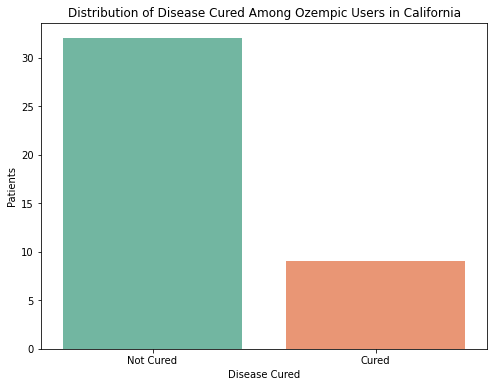

In [77]:
# Plotting the distribution of disease cured
california_ozempic_data = df2[(df2['patient_state_CA'] == 1) & (df2['ozempic'] == 1)]
plt.figure(figsize=(8, 6))
sns.countplot(x='disease_cured', data=california_ozempic_data, palette='Set2')
plt.title('Distribution of Disease Cured Among Ozempic Users in California')
plt.xlabel('Disease Cured')
plt.ylabel('Patients')
plt.xticks(ticks=[0, 1], labels=['Not Cured', 'Cured'])
plt.show()

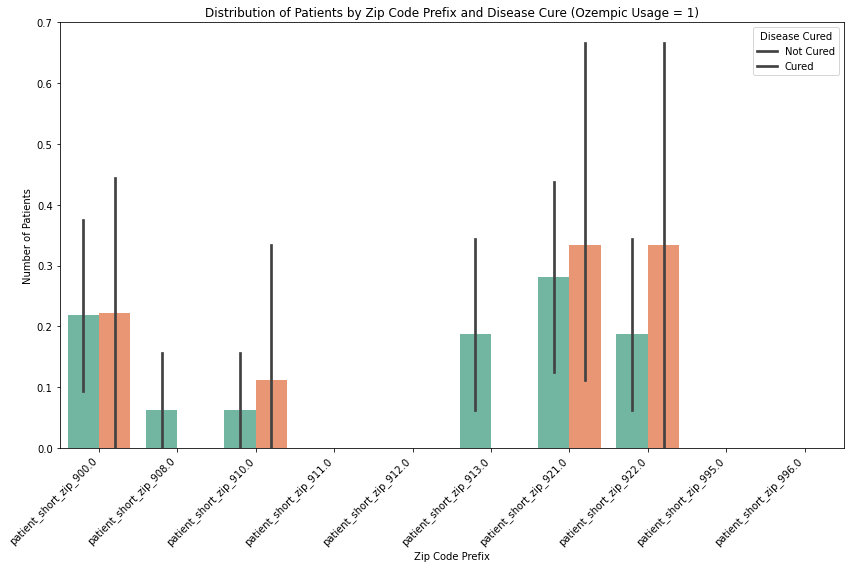

In [78]:
zip_columns = ['patient_short_zip_900.0', 'patient_short_zip_908.0', 'patient_short_zip_910.0', 
               'patient_short_zip_911.0', 'patient_short_zip_912.0', 'patient_short_zip_913.0', 
               'patient_short_zip_921.0', 'patient_short_zip_922.0', 'patient_short_zip_995.0', 
               'patient_short_zip_996.0']

plot_data = df2[df2['ozempic'] == 1][['disease_cured'] + zip_columns]
plot_data_melted = plot_data.melt(id_vars='disease_cured', var_name='Zip_Code', value_name='Patient_Count')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=plot_data_melted, x='Zip_Code', y='Patient_Count', hue='disease_cured', palette='Set2')
plt.title('Distribution of Patients by Zip Code Prefix and Disease Cure (Ozempic Usage = 1)')
plt.xlabel('Zip Code Prefix')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Disease Cured', loc='upper right', labels=['Not Cured', 'Cured'])
plt.tight_layout()
plt.show()

- 900 - Los Angeles
- 908 - Long Beach
- 910 - Atlana
- 913 - Agoura Hills , LA
- 921 - San Diego 
- 922 - Riverside 

In my opinion, most of zipcodes are in California who receive Ozempic with areas in with wealthy high cost of living - Southern California neighborhoods and the influencer culture behind body wellness. 

Given, those disparities, disease cured in most patients when given ozempic is low, because maybe they are taking it only to have the effects of weightloss instead of diabetes.

The side effect of weight loss makes it a very quick and attractive option to body conscious individuals who want to lose body weight fast.

These patients have resources such as doctors who will and can prescribe ozempic for weight hence impacting our analysis of seeing the real impact of ozempic. 


***Potential issues of faulty treatment effects***

Our dataset includes disproportionate people who belong to wealthier areas, who might be potentially using Ozempic for reasons other than hyptertension & obesity. This presents the issue of selection bias within our dataset.

If we are not able to distinguish between groups who take the medicine for its intended use vs using it for its side effects, our treatment group is not well defined.

To mitigate this, we can try stratifying our treatment group on people based on their location.
We would have loved to this if we had more computing power presented to us. Since our delicate machines kept crashing on the small dataset, we decided it was not ethical to crush our machines with a cumbersome stratification of treatment group based on area codes.

